# QIIME 2 Workflow for OGT paper:
Adapted from Vanja's Qiime2_Workflow_MicrobialMatt_August2020 python notebook



# This workflow was generated from LangilleLab workflow and Qiime Tutorials

## Qiime 2 workflow

For this particular dataset, argonne - I am using different primers from EMP.

used Qiime2 and Langille lab tutorials to piece this together. There's definitely room for improvement.

Qiime2 uses two different types of files that contain the data and metadata for the analysis (.qza and .qzv files). To see what type of data is contained in a data file, use the command qiime tools peek filename.qza. The files will contain basic info (name, universally unique identifier, data type and dataformat). the raw data in these files can be accessed using the command qiime tools export

updated and ran in June 2020 using qiime2-2020.2 to process Danielle's ECHO 16S samples (130 of them)   


### Assign taxonomy

Pre-fitted classifer was generated by Vanja (sept 1, 2020) using the SOP for creating QIIME2 taxonomic classifers (see link below) specific to the 341F and 806R primers. Specifically, she pulled out reference reads using Forsyth primers used from the SILVA_132_QIIME_release/taxonomy/16S_only/99/majority_taxonomy_7_levels.txt file; reference read lengths were maintained as 300bp min and 500bp max. She then generated a scikit-learn naive bayes classifier on these reference reads. 

Langille lab SOP:
https://github.com/LangilleLab/microbiome_helper/wiki/Creating-QIIME-2-Taxonomic-Classifiers

In [1]:
'''Set metadata variable'''

METADATA = "md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected.txt"

METADATA_downstream = "md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected-downstream.txt"


In [2]:
'''Load libraries for figure creation'''
import pandas as pd
import numpy as np

import seaborn as sns

# sns.set(style="ticks")
# import matplotlib as matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
#Load and modify in pandas
# md_taxa = pd.read_table(METADATA_downstream)
# # Create new column that specifies pateint 9 within the Teeth_cat_Day1_grt 
# md_taxa['Teeth_cat_Day1_grt_pat9'] = md_taxa.apply(lambda row: np.nan\
#              if row['Source']!="O" else ("pat9" if row["subjectID"]==9 \
#             else row["Teeth_cat_Day1_grt"]), axis=1)

# md_taxa['Teeth_cat_pat9'] = md_taxa.apply(lambda row: np.nan\
#              if row['Source']!="O" else ("pat9" if row["subjectID"]==9 \
#             else row["Teeth_cat"]), axis=1)

# md_taxa['subjectID_cat'] = md_taxa.apply(lambda row: "patient "+str(row["subjectID"]), axis=1)
# md_taxa['day_cat'] = md_taxa.apply(lambda row: "day "+str(row["Day"]), axis=1)

# md_taxa.head()
# md_taxa.to_csv("md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected-downstream-taxa.txt",
#                sep='\t', index=False)

METADATA_downstream_taxa = "md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected-downstream-taxa.txt"


In [1]:
'''Create categorical metadata file'''

# CATEGORY = 'subjectID_cat'
#Load and modify in pandas
# md_taxa_cat = pd.read_table(METADATA_downstream_taxa)
# md_taxa_cat['#SampleID'] = md_taxa_cat[CATEGORY]
# md_taxa_cat.head()
# md_taxa_cat.to_csv("md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected-downstream-taxa-"+CATEGORY+".txt",
#                sep='\t', index=False)

# METADATA_downstream_taxa_cat = "md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected-downstream-taxa-"+CATEGORY+".txt"


'Create categorical metadata file'

In [1]:
"Assign taxonomy based on 16S V4/V5 region specific to 341F and 806R primers"

!qiime feature-classifier classify-sklearn \
  --i-reads DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs.qza \
  --i-classifier taxa_classifiers/classifier_silva_132_16S_v3v4.qza \
  --p-n-jobs 1 \
  --output-dir DADA2_full/taxa



Saved FeatureData[Taxonomy] to: DADA2_full/taxa/classification.qza


In [3]:
'''Convert taxonomy output to a visual'''

!qiime metadata tabulate \
  --m-input-file DADA2_full/taxa/classification.qza \
  --o-visualization DADA2_full/taxa/classification.qzv

Saved Visualization to: DADA2_full/taxa/classification.qzv


Spot and sanity check to ensure that silva classifications and associate confidence values match Blast outputs.

For feature ff7fb0808cab7342f2e2601407e38128, silva output was D_5__Atopobium with 99% confidence. The blast output was Atopobium parvulum strain (MT436645.1), partial sequence with 97% identity.



In [40]:
'''View silva classification outputs'''

!qiime tools view DADA2_full/taxa/classification.qzv


Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

In [6]:
'''View features to get blast results'''

!qiime tools view DADA2_full/CHBoral_PairedEndSeq_demux-full-rep-seqs.qzv


Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

Spot checking to determine whether rare ASVs have biologically relevant taxonomic classifications and high associated confidenceMerge feature taxonomy with feature frequence

Overall, the features with high sequence length have relevant classifications and high confidence values (99 confidence). Features wqith short sequence length (394bp) have relevant classifications but moderate confidence values (~80-89 confidence)

Given this results, rare ASVs will not be excluded and will be kept for all downstream analyses including diversity.


## Downstream Taxaonomy Analyses

In [52]:
'''Visualize the taxaonomic composition as bar plots'''

!qiime taxa barplot \
  --i-table DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table.qza \
  --i-taxonomy DADA2_full/taxa/classification.qza \
  --m-metadata-file mappingfile_NileshMehta_with_Metadata_062715_corrected.txt \
  --o-visualization DADA2_full/taxa/classification-bar-plots.qzv


Saved Visualization to: DADA2_full/taxa/classification-bar-plots.qzv


In [11]:
'''View the visualization'''

!qiime tools view DADA2_full/taxa/classification-bar-plots.qzv

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

In [16]:
'''Merge feature frequences with feature taxonomies collapsed at level 7 (species)'''

# !qiime taxa collapse \
#   --i-table DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table.qza \
#   --i-taxonomy DADA2_full/taxa/classification.qza \
#   --p-level 7 \
#   --o-collapsed-table DADA2_full/taxa/level/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa7.qza

!qiime taxa collapse \
  --i-table DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table.qza \
  --i-taxonomy DADA2_full/taxa/classification.qza \
  --p-level 6 \
  --o-collapsed-table DADA2_full/taxa/level/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6.qza

Saved FeatureTable[Frequency] to: DADA2_full/taxa/level/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6.qza


In [23]:

'''Add pseudocount of 1 per feature''' 
!qiime composition add-pseudocount \
   --i-table DADA2_full/taxa/level/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa7.qza \
   --p-pseudocount 1 \
   --o-composition-table DADA2_full/taxa/level/composition/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa7_pseudocount.qza


!qiime composition add-pseudocount \
   --i-table DADA2_full/taxa/level/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6.qza \
   --p-pseudocount 1 \
   --o-composition-table DADA2_full/taxa/level/composition/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6_pseudocount.qza


Saved FeatureTable[Composition] to: DADA2_full/taxa/level/composition/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa7_pseudocount.qza
Saved FeatureTable[Composition] to: DADA2_full/taxa/level/composition/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6_pseudocount.qza


In [43]:
# !qiime tools export \
#    --input-path DADA2_full/taxa/level/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6.qza \
#    --output-path DADA2_full/taxa/figure1/table-taxa6


!qiime feature-table relative-frequency \
   --i-table DADA2_full/taxa/level/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6.qza \
   --o-relative-frequency-table DADA2_full/taxa/level/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6-RA.qza

!qiime tools export \
   --input-path DADA2_full/taxa/level/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6-RA.qza \
   --output-path DADA2_full/taxa/figure1/table-taxa6_composition



Saved FeatureTable[RelativeFrequency] to: DADA2_full/taxa/level/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6-RA.qza
Exported DADA2_full/taxa/level/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6-RA.qza as BIOMV210DirFmt to directory DADA2_full/taxa/figure1/table-taxa6_composition


In [44]:
'''convert biom to tsv'''

# !biom convert -i DADA2_full/taxa/figure1/table-taxa6/feature-table.biom -o DADA2_full/taxa/figure1/table-taxa6/feature-table.txt --to-tsv

!biom convert -i DADA2_full/taxa/figure1/table-taxa6_composition/feature-table.biom -o DADA2_full/taxa/figure1/table-taxa6_composition/feature-table.txt --to-tsv



In [3]:
'''Load genus level feature table'''
taxa6 = pd.read_table('DADA2_full/taxa/figure1/table-taxa6_composition/feature-table.txt')

taxa6 = taxa6.reset_index()

taxa6.columns = taxa6.iloc[0].tolist()
taxa6 = taxa6.iloc[1:]
# taxa6 = taxa6.set_index(taxa6['#OTU ID'])
# taxa6 = taxa6.drop('#OTU ID', axis=1)

astype_dict = {col: 'float64' for col in taxa6.columns if 'OTU' not in col}
taxa6 = taxa6.astype(astype_dict)
taxa6.head()


# create a somewhat 2D table
taxa6_melt = pd.melt(taxa6, id_vars='#OTU ID', value_vars=[col for col in taxa6.columns if 'OTU' not in col])
# filter for taxa with RA >0.05
# taxa6_melt_grt5 = taxa6_melt.where(taxa6_melt['value']>0.05).dropna(how='all')
# taxa6_melt_grt5.fillna(0)

taxa6_melt_grt5 = taxa6_melt.where(taxa6_melt['value']>0.05).dropna(how='all')
taxa6_melt_grt5_all = taxa6_melt[taxa6_melt['#OTU ID'].isin(taxa6_melt_grt5['#OTU ID'].unique())]

# pull out genus column
taxa6_melt_grt5_all['D5_OTUID'] = taxa6_melt_grt5_all['#OTU ID'].str.split(';', 
                                expand=True)[5].str.split('D_5__', expand=True)[1]





/Users/manjotkaurnagyal/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
'''Create dict to map color, styles, etc for bubble plot'''
# add md values
md = pd.read_table(METADATA_downstream)
md['hue'] = md.apply(lambda row: row['Source']+'-'+str(int(row['subjectID']))\
             if row['subjectID']==9.0 else row['Source'], axis=1)

samp_source_dict = md[['#SampleID', 'hue']].set_index("#SampleID").to_dict()['hue']
hue_dict = {'O':'cornflowerblue', 'O-9':'darkblue', 'T': 'limegreen', 'T-9':'darkgreen', 'G':'tomato', 'G-9':'darkred'}
# ticklabel_order_dict = {'004.G1':3, '004.O1':1, '004.T1':2, '005.O1':4, '006.O1':5, '006.O2':6,
#        '006.O4':7, '007.O1':8, '009.G1':17, '009.G10':19, '009.G2':18, '009.O1':9,
#        '009.O10':13, '009.O2':10, '009.O3':11, '009.O5':12, '009.T1':14, '009.T10':16,
#        '009.T2':15, '010.O1':20, '010.O3':21, '011.O1':22, '011.O3':23, '011.T1':24,
#        '012.O1':25, '012.O3':26, '012.O5':27, '013.O1':28, '013.O2':29, '014.O1':30,
#        '015.O1':31}
# Get dicts to columns to sort by
samp_day_dict = md[['#SampleID', 'Day']].set_index("#SampleID").to_dict()['Day']
samp_subjectID_dict = md[['#SampleID', 'subjectID']].set_index("#SampleID").to_dict()['subjectID']
hue_order_dict = {'O':1, 'T':2, 'G':3, 'O-9':4, 'T-9':5, 'G-9':6}

taxa6_melt_grt5_all['source_hue'] = taxa6_melt_grt5_all['variable'].map(samp_source_dict)
taxa6_melt_grt5_all['hue'] = taxa6_melt_grt5_all['source_hue'].map(hue_dict)
# taxa6_melt_grt5_all['ticklabel_order'] = taxa6_melt_grt5_all['variable'].map(ticklabel_order_dict)
taxa6_melt_grt5_all['Day'] = taxa6_melt_grt5_all['variable'].map(samp_day_dict)
taxa6_melt_grt5_all['subjectID'] = taxa6_melt_grt5_all['variable'].map(samp_subjectID_dict)
taxa6_melt_grt5_all['hue_order'] = taxa6_melt_grt5_all['source_hue'].map(hue_order_dict)

# sort
taxa6_melt_grt5_all = taxa6_melt_grt5_all.sort_values(by=['D5_OTUID'], ascending=False)
taxa6_melt_grt5_all = taxa6_melt_grt5_all.sort_values(by=['subjectID', 'Day', 'hue_order'])



/Users/manjotkaurnagyal/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/manjotkaurnagyal/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/manjotkaurnagyal/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

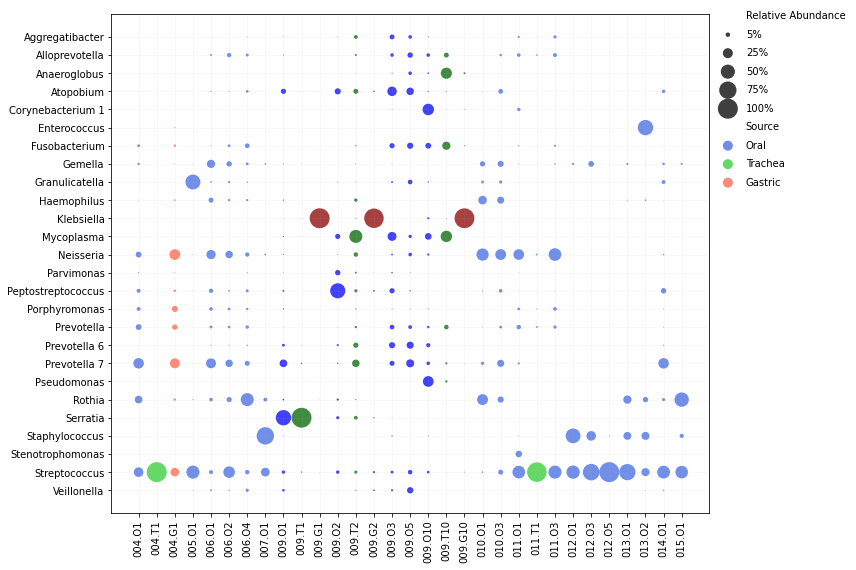

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#set markersize from values to better see the difference
size = 400

fig = plt.figure(figsize=(12,8))
#plot categorical scatter plot
plt.scatter(taxa6_melt_grt5_all['variable'], taxa6_melt_grt5_all['D5_OTUID'], s = taxa6_melt_grt5_all['value']*size, 
            linewidths=0, c = taxa6_melt_grt5_all['hue'], zorder = 1, alpha=0.75)
#plot grid behind markers
plt.grid(ls = "-", alpha=0.1)

# add legend
legend_dict = {"Relative Abundance":(0, 'o', 'k'), '5%':(0.05*size, 'o', 'k'), 
               '25%':(0.25*size, 'o', 'k'), '50%':(.5*size, 'o', 'k'), '75%':(0.75*size, 'o', 'k'), 
               '100%':(1*size, 'o', 'k'), 
               "Source":(0, 'o', 'k'), 'Oral':(100, 'o', 'cornflowerblue'), 
               "Trachea":(100, 'o', 'limegreen'), "Gastric":(100, 'o', 'tomato')}
for leg in legend_dict:
    plt.scatter([], [], c=legend_dict[leg][2], alpha=0.75, s=legend_dict[leg][0],
                marker=legend_dict[leg][1], label=leg, linewidths=5, edgecolors='none')

plt.legend(scatterpoints=1, frameon=False, labelspacing=0.85, bbox_to_anchor=(1,1.025))
# modify tick labels
plt.xticks(rotation=90)

#take care of long labels
plt.tight_layout()
plt.savefig("Figures/sns_output/taxa_fig1.svg",
           quality=95, format='svg', transparent=False)


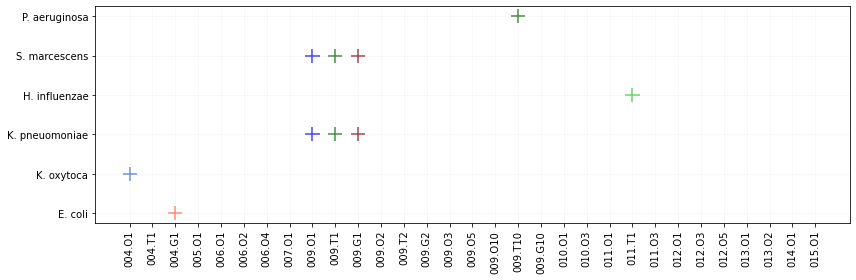

In [5]:
### create dataframe with cul data:
# pd.DataFrame(taxa6_melt_grt5_all['variable'].unique()).to_csv("Figures/sns_output/taxa_fig1_cult_incomp_df.csv", sep='\t', index=False)


cul_df = pd.read_csv("Figures/sns_output/taxa_fig1_cult_comp_df.csv")

#set markersize from values to better see the difference
size = 200

fig = plt.figure(figsize=(12,4))
#plot categorical scatter plot
plt.scatter(cul_df['variable'], cul_df['taxa'], s = cul_df['value']*size, 
            linewidths=0, c = cul_df['hue'], zorder = 1, alpha=0.75, marker = '+')
#plot grid behind markers
plt.grid(ls = "-", alpha=0.1)

# modify tick labels
plt.xticks(rotation=90)

#take care of long labels
plt.tight_layout()
# plt.savefig("Figures/sns_output/taxa_fig1_cult.svg",
#            quality=95, format='svg', transparent=False)


In [14]:

mol_fig_plot['hue'].unique()

array(['cornflowerblue', 'tomato', 'limegreen', 'darkred', 'darkblue',
       'darkgreen'], dtype=object)

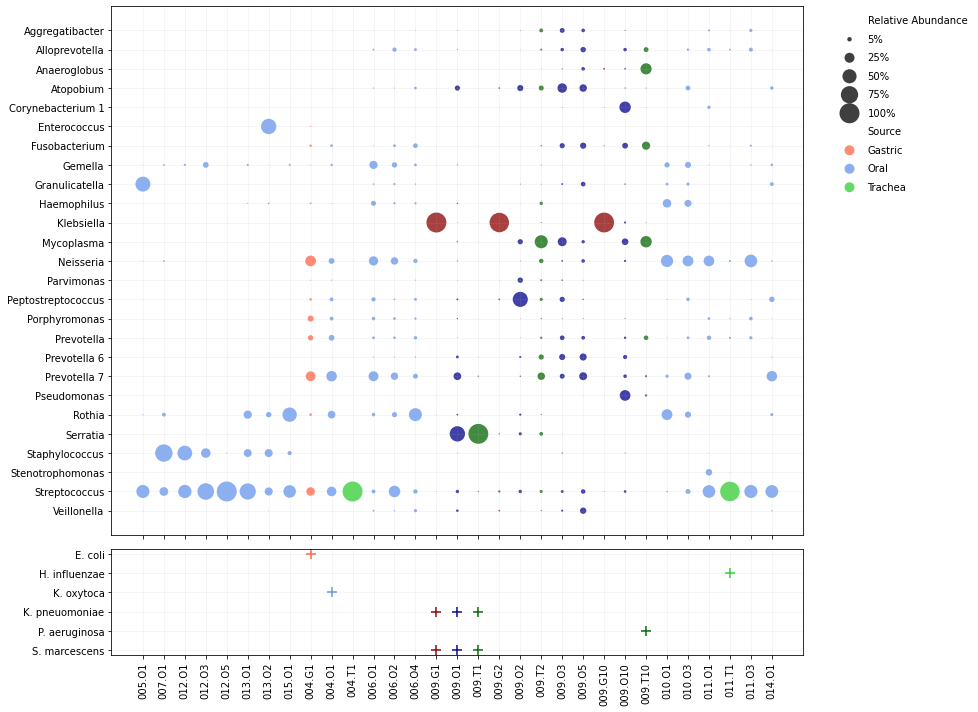

In [17]:
'''molecular data/fig with cul/fig data to get one bubble plot'''

id_teeth = pd.read_csv(METADATA, delimiter='\t')[['Description', 'Teeth']].set_index(['Description']).to_dict()['Teeth']
mol_rawdata = pd.read_table('DADA2_full/taxa/figure1/table-taxa6_composition/feature-table.txt')
mol_rawdata = mol_rawdata.reset_index()

mol_rawdata.columns = mol_rawdata.iloc[0].tolist()
mol_rawdata = mol_rawdata.iloc[1:]

# mol_rawdata.to_csv('Figures/sns_output/mol_fig_plot_in.csv', index=False)

# get molecular data and get pat/day/source columns
mol_fig_plot = taxa6_melt_grt5_all[['variable', 'D5_OTUID', 'value', 'hue', '#OTU ID']].reset_index(drop=True)

mol_fig_plot['teeth'] = mol_fig_plot['variable'].map(id_teeth)

mol_fig_plot['patient'] = mol_fig_plot['variable'].str.split('.', expand=True)[0]
mol_fig_plot['source'] = mol_fig_plot['variable'].str.split('.', expand=True)[1].str[0]
mol_fig_plot['day'] = mol_fig_plot['variable'].str.split('.', expand=True)[1].str[1:].astype('int')

# get cul data and get pat/day/source columns
cul_fig_plot = cul_df
cul_fig_plot['taxa'] = cul_fig_plot['taxa'].astype('str')

cul_fig_plot['teeth'] = cul_fig_plot['variable'].map(id_teeth)

cul_fig_plot['patient'] = cul_fig_plot['variable'].str.split('.', expand=True)[0]
cul_fig_plot['source'] = cul_fig_plot['variable'].str.split('.', expand=True)[1].str[0]
cul_fig_plot['day'] = cul_fig_plot['variable'].str.split('.', expand=True)[1].str[1:].astype('int')

# sort the order of x and y axis

mol_fig_plot = mol_fig_plot.sort_values(by=['D5_OTUID'], ascending=False)
mol_fig_plot = mol_fig_plot.sort_values(by=['teeth', 'patient', 'day', 'source'])



cul_fig_plot = cul_fig_plot.sort_values(by=['taxa'], ascending=False)
cul_fig_plot = cul_fig_plot.sort_values(by=['teeth', 'patient', 'day', 'source'])

mol_fig_plot['hue'].replace('royalblue', 'cornflowerblue', inplace=True)
mol_fig_plot['hue'].replace('blue', 'darkblue', inplace=True)
cul_fig_plot['hue'].replace('royalblue', 'cornflowerblue', inplace=True)
cul_fig_plot['hue'].replace('blue', 'darkblue', inplace=True)

# save mol and cul input data as csv
mol_fig_plot.to_csv("Figures/sns_output/mol_fig_plot_out.csv", index=False)
cul_fig_plot.to_csv("Figures/sns_output/cul_fig_plot_out.csv", index=False)



# set up subplot framework
f, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[2.5, 0.5]}, figsize=(14,10))
#set markersize from values to better see the difference
size = 400

#plot top fig with mol data
axs[0].scatter(mol_fig_plot['variable'], mol_fig_plot['D5_OTUID'], s = mol_fig_plot['value']*size, 
            linewidths=0, c = mol_fig_plot['hue'], zorder = 1, alpha=0.75)



#plot bottom fig with cul data
axs[1].scatter(cul_fig_plot['variable'], cul_fig_plot['taxa'], s = cul_fig_plot['value']*size/4, 
            linewidths=0, c = cul_fig_plot['hue'], zorder = 1, marker = '+')


# # add legend
legend_dict = {"Relative Abundance":(0, 'o', 'k'), '5%':(0.05*size, 'o', 'k'), 
               '25%':(0.25*size, 'o', 'k'), '50%':(.5*size, 'o', 'k'), '75%':(0.75*size, 'o', 'k'), 
               '100%':(1*size, 'o', 'k'), 
               "Source":(0, 'o', 'k'), "Gastric":(100, 'o', 'tomato'), 'Oral':(100, 'o', 'cornflowerblue'), 
               "Trachea":(100, 'o', 'limegreen')}
for leg in legend_dict:
    axs[0].scatter([], [], c=legend_dict[leg][2], alpha=0.75, s=legend_dict[leg][0],
                marker=legend_dict[leg][1], label=leg, linewidths=5, edgecolors='none')

axs[0].legend(scatterpoints=1, frameon=False, labelspacing=0.85, bbox_to_anchor=(1.25, 1, 0, 0))

#plot grid behind markers
axs[0].grid(ls = "-", alpha=0.15)
axs[1].grid(ls = "-", alpha=0.15)
# modify tick labels
plt.xticks(rotation=90)
#take care of long labels
plt.tight_layout()

plt.savefig("Figures/sns_output/taxa_fig1all_v2.svg",
           quality=95, format='svg', transparent=False)


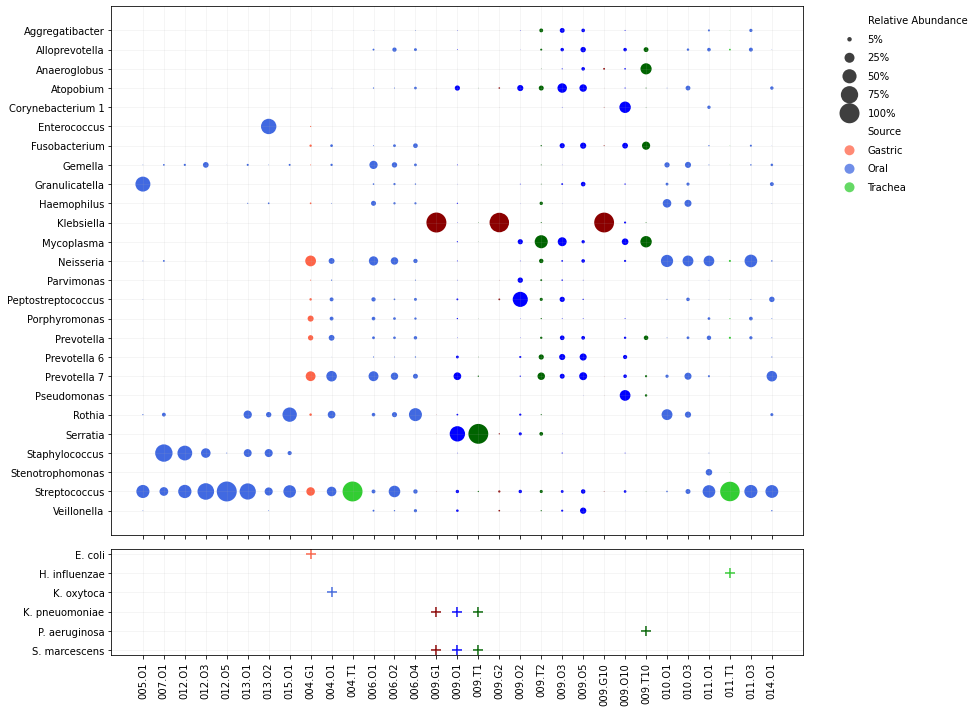

In [6]:
'''molecular data/fig with cul/fig data to get one bubble plot'''

id_teeth = pd.read_csv(METADATA, delimiter='\t')[['Description', 'Teeth']].set_index(['Description']).to_dict()['Teeth']
mol_rawdata = pd.read_table('DADA2_full/taxa/figure1/table-taxa6_composition/feature-table.txt')
mol_rawdata = mol_rawdata.reset_index()

mol_rawdata.columns = mol_rawdata.iloc[0].tolist()
mol_rawdata = mol_rawdata.iloc[1:]

mol_rawdata.to_csv('Figures/sns_output/mol_fig_plot_in.csv', index=False)

# get molecular data and get pat/day/source columns
mol_fig_plot = taxa6_melt_grt5_all[['variable', 'D5_OTUID', 'value', 'hue', '#OTU ID']].reset_index(drop=True)

mol_fig_plot['teeth'] = mol_fig_plot['variable'].map(id_teeth)

mol_fig_plot['patient'] = mol_fig_plot['variable'].str.split('.', expand=True)[0]
mol_fig_plot['source'] = mol_fig_plot['variable'].str.split('.', expand=True)[1].str[0]
mol_fig_plot['day'] = mol_fig_plot['variable'].str.split('.', expand=True)[1].str[1:].astype('int')

# get cul data and get pat/day/source columns
cul_fig_plot = cul_df
cul_fig_plot['taxa'] = cul_fig_plot['taxa'].astype('str')

cul_fig_plot['teeth'] = cul_fig_plot['variable'].map(id_teeth)

cul_fig_plot['patient'] = cul_fig_plot['variable'].str.split('.', expand=True)[0]
cul_fig_plot['source'] = cul_fig_plot['variable'].str.split('.', expand=True)[1].str[0]
cul_fig_plot['day'] = cul_fig_plot['variable'].str.split('.', expand=True)[1].str[1:].astype('int')

# sort the order of x and y axis

mol_fig_plot = mol_fig_plot.sort_values(by=['D5_OTUID'], ascending=False)
mol_fig_plot = mol_fig_plot.sort_values(by=['teeth', 'patient', 'day', 'source'])



cul_fig_plot = cul_fig_plot.sort_values(by=['taxa'], ascending=False)
cul_fig_plot = cul_fig_plot.sort_values(by=['teeth', 'patient', 'day', 'source'])


# save mol and cul input data as csv
mol_fig_plot.to_csv("Figures/sns_output/mol_fig_plot_out.csv", index=False)
cul_fig_plot.to_csv("Figures/sns_output/cul_fig_plot_out.csv", index=False)


# set up subplot framework
f, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[2.5, 0.5]}, figsize=(14,10))
#set markersize from values to better see the difference
size = 400

#plot top fig with mol data
axs[0].scatter(mol_fig_plot['variable'], mol_fig_plot['D5_OTUID'], s = mol_fig_plot['value']*size, 
            linewidths=0, c = mol_fig_plot['hue'], zorder = 1)



#plot bottom fig with cul data
axs[1].scatter(cul_fig_plot['variable'], cul_fig_plot['taxa'], s = cul_fig_plot['value']*size/4, 
            linewidths=0, c = cul_fig_plot['hue'], zorder = 1, marker = '+')


# # add legend
legend_dict = {"Relative Abundance":(0, 'o', 'k'), '5%':(0.05*size, 'o', 'k'), 
               '25%':(0.25*size, 'o', 'k'), '50%':(.5*size, 'o', 'k'), '75%':(0.75*size, 'o', 'k'), 
               '100%':(1*size, 'o', 'k'), 
               "Source":(0, 'o', 'k'), "Gastric":(100, 'o', 'tomato'), 'Oral':(100, 'o', 'cornflowerblue'), 
               "Trachea":(100, 'o', 'limegreen')}
for leg in legend_dict:
    axs[0].scatter([], [], c=legend_dict[leg][2], alpha=0.75, s=legend_dict[leg][0],
                marker=legend_dict[leg][1], label=leg, linewidths=5, edgecolors='none')

axs[0].legend(scatterpoints=1, frameon=False, labelspacing=0.85, bbox_to_anchor=(1.25, 1, 0, 0))

#plot grid behind markers
axs[0].grid(ls = "-", alpha=0.15)
axs[1].grid(ls = "-", alpha=0.15)
# modify tick labels
plt.xticks(rotation=90)
#take care of long labels
plt.tight_layout()

# plt.savefig("Figures/sns_output/taxa_fig1all_v1.svg",
#            quality=95, format='svg', transparent=False)


## Statistical testing

### ANCOM: Analysis of composition of microbiomes

Focus on Oral vs Gastric vs Tracheal sampling with VAP vs no VAP variable consideration
Focus on teeth vs no teeth patients (how does this relate to the paper thesis?)

1. Using ANCOM determine if the relative abundance of features is impacted by source site and VAP diagnoses(sampling days are controlled for)

In [14]:
!ls DADA2_full/taxa/level/

CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6-RA.qza
CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6.qza
CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa7.qza
composition
frequency


In [ ]:
'''Identify important features and plot relative abundances'''

volatile_INPUT_TABLE = 'DADA2_full/taxa/level/frequency/sample_site/table_taxa6_oral.qza'

!qiime longitudinal feature-volatility \
   --i-table $volatile_INPUT_TABLE \
   --m-metadata-file $METADATA_downstream_taxa \
   --p-state-column 'Day' \
   --p-individual-id-column 'subjectID_cat' \
   --o-filtered-table DADA2_full/taxa/level/frequency/sample_site/oral_volatile/importFeature_table_taxa6_oral.qza \
   --o-feature-importance DADA2_full/taxa/level/frequency/sample_site/oral_volatile/importFeature_data_taxa6_oral.qza \
   --o-volatility-plot DADA2_full/taxa/level/frequency/sample_site/oral_volatile/Plot_importFeature_taxa6_oral.qzv \
   --o-accuracy-results DADA2_full/taxa/level/frequency/sample_site/oral_volatile/Result_importFeature_taxa6_oral.qzv \
   --o-sample-estimator DADA2_full/taxa/level/frequency/sample_site/oral_volatile/Regressor_importFeature_taxa6_oral.qza
    

In [30]:
'''Categorical visualization of taxonomy'''

!qiime feature-table group \
   --i-table DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table.qza \
   --p-axis sample \
   --p-mode sum \
   --m-metadata-file $METADATA_downstream_taxa \
   --m-metadata-column $CATEGORY \
   --o-grouped-table DADA2_full/taxa/cat_visuals/feature_table_group_cat.qza



Saved FeatureTable[Frequency] to: DADA2_full/taxa/cat_visuals/feature_table_group_cat.qza


In [3]:
!qiime taxa barplot \
   --i-table DADA2_full/taxa/cat_visuals/feature_table_group_cat.qza \
   --i-taxonomy DADA2_full/taxa/classification.qza \
   --m-metadata-file $METADATA_downstream_taxa \
   --o-visualization DADA2_full/taxa/cat_visuals/classification_barplots_cat.qzv



Plugin error from taxa:

  Sample IDs found in the table are missing in the metadata: {'patient 12', 'patient 4', 'patient 7', 'patient 11', 'patient 13', 'patient 10', 'patient 15', 'patient 5', 'patient 14', 'patient 6', 'patient 9'}.

Debug info has been saved to /var/folders/nl/sfclrs613lj1n2cqbthz87r80000gn/T/qiime2-q2cli-err-rrq5wu_r.log


In [25]:
!qiime tools export \
   --input-path DADA2_full/taxa/cat_visuals/feature_table_group-subjectID_cat.qza \
   --output-path temp

Exported DADA2_full/taxa/cat_visuals/feature_table_group-subjectID_cat.qza as BIOMV210DirFmt to directory temp


In [5]:
!qiime tools view DADA2_full/taxa/classification-bar-plots.qzv




Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

#### Identifying differentially abundant features with ANCOM
ANCOM requires non-zero counts

Significance is determined for taxa at species (7) and genus(6) level that are differentially abundant based on patient. Analysis was filtered based on sample sites.

In [30]:
'''ANCOM for 3 different sample sites'''
#filter for taxa6 level
INPUT_TABLE = 'DADA2_full/taxa/level/composition/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6_pseudocount.qza'

# oral
!qiime feature-table filter-samples \
  --i-table $INPUT_TABLE \
  --m-metadata-file $METADATA_downstream_taxa \
  --p-where "[Source]='O'" \
  --o-filtered-table DADA2_full/taxa/level/composition/sample_site/table_taxa6_oral.qza
 
# trachae    
!qiime feature-table filter-samples \
  --i-table $INPUT_TABLE \
  --m-metadata-file $METADATA_downstream_taxa \
  --p-where "[Source]='T'" \
  --o-filtered-table DADA2_full/taxa/level/composition/sample_site/table_taxa6_trachae.qza

# gastric
!qiime feature-table filter-samples \
  --i-table $INPUT_TABLE \
  --m-metadata-file $METADATA_downstream_taxa \
  --p-where "[Source]='G'" \
  --o-filtered-table DADA2_full/taxa/level/composition/sample_site/table_taxa6_gastric.qza



Saved FeatureTable[Composition] to: DADA2_full/taxa/level/composition/sample_site/table_taxa6_oral.qza
Saved FeatureTable[Composition] to: DADA2_full/taxa/level/composition/sample_site/table_taxa6_trachae.qza
Saved FeatureTable[Composition] to: DADA2_full/taxa/level/composition/sample_site/table_taxa6_gastric.qza


In [41]:
'''Identify differentially abundant taxa'''
ancom_INPUT_TABLE = 'DADA2_full/taxa/level/composition/sample_site/table_taxa6_gastric.qza'
ancom_CATEGORY = 'subjectID_cat'
ancom_outdir = 'DADA2_full/taxa/level/composition/ancom_output/subjectID/taxa6/gastric'

# !qiime composition ancom \
#    --i-table DADA2_full/taxa/level/composition/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa7_pseudocount.qza \
#    --m-metadata-file $METADATA_downstream_taxa \
#    --m-metadata-column $ancom_CATEGORY \
#    --output-dir DADA2_full/taxa/level/composition/ancom_output/taxa7


# !qiime composition ancom \
#    --i-table DADA2_full/taxa/level/composition/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6_pseudocount.qza \
#    --m-metadata-file $METADATA_downstream_taxa \
#    --m-metadata-column $ancom_CATEGORY \
#    --output-dir DADA2_full/taxa/level/composition/ancom_output/subjectID/taxa6

!qiime composition ancom \
   --i-table $ancom_INPUT_TABLE \
   --m-metadata-file $METADATA_downstream_taxa \
   --m-metadata-column $ancom_CATEGORY \
   --output-dir $ancom_outdir


Saved Visualization to: DADA2_full/taxa/level/composition/ancom_output/subjectID/taxa6/gastric/visualization.qzv


In [17]:

!qiime tools view DADA2_full/taxa/level/composition/ancom_output/subjectID/taxa6/gastric/visualization.qzv



Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

In [53]:
'''Frequency for 3 different sample sites'''
#filter for taxa6 level
INPUT_TABLE = 'DADA2_full/taxa/level/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6.qza'

# oral
!qiime feature-table filter-samples \
  --i-table $INPUT_TABLE \
  --m-metadata-file $METADATA_downstream_taxa \
  --p-where "[Source]='O'" \
  --o-filtered-table DADA2_full/taxa/level/frequency/sample_site/table_taxa6_oral.qza
 
# trachae    
!qiime feature-table filter-samples \
  --i-table $INPUT_TABLE \
  --m-metadata-file $METADATA_downstream_taxa \
  --p-where "[Source]='T'" \
  --o-filtered-table DADA2_full/taxa/level/frequency/sample_site/table_taxa6_trachae.qza

# gastric
!qiime feature-table filter-samples \
  --i-table $INPUT_TABLE \
  --m-metadata-file $METADATA_downstream_taxa \
  --p-where "[Source]='G'" \
  --o-filtered-table DADA2_full/taxa/level/frequency/sample_site/table_taxa6_gastric.qza

Saved FeatureTable[Frequency] to: DADA2_full/taxa/level/frequency/sample_site/table_taxa6_oral.qza
Saved FeatureTable[Frequency] to: DADA2_full/taxa/level/frequency/sample_site/table_taxa6_trachae.qza
Saved FeatureTable[Frequency] to: DADA2_full/taxa/level/frequency/sample_site/table_taxa6_gastric.qza


In [65]:
'''Identify important features and plot relative abundances'''

volatile_INPUT_TABLE = 'DADA2_full/taxa/level/frequency/sample_site/table_taxa6_oral.qza'

!qiime longitudinal feature-volatility \
   --i-table $volatile_INPUT_TABLE \
   --m-metadata-file $METADATA_downstream_taxa \
   --p-state-column 'Day' \
   --p-individual-id-column 'subjectID_cat' \
   --o-filtered-table DADA2_full/taxa/level/frequency/sample_site/oral_volatile/importFeature_table_taxa6_oral.qza \
   --o-feature-importance DADA2_full/taxa/level/frequency/sample_site/oral_volatile/importFeature_data_taxa6_oral.qza \
   --o-volatility-plot DADA2_full/taxa/level/frequency/sample_site/oral_volatile/Plot_importFeature_taxa6_oral.qzv \
   --o-accuracy-results DADA2_full/taxa/level/frequency/sample_site/oral_volatile/Result_importFeature_taxa6_oral.qzv \
   --o-sample-estimator DADA2_full/taxa/level/frequency/sample_site/oral_volatile/Regressor_importFeature_taxa6_oral.qza
    

Saved FeatureTable[RelativeFrequency] to: DADA2_full/taxa/level/frequency/sample_site/oral_volatile/importFeature_table_taxa6_oral.qza
Saved FeatureData[Importance] to: DADA2_full/taxa/level/frequency/sample_site/oral_volatile/importFeature_data_taxa6_oral.qza
Saved Visualization to: DADA2_full/taxa/level/frequency/sample_site/oral_volatile/Plot_importFeature_taxa6_oral.qzv
Saved Visualization to: DADA2_full/taxa/level/frequency/sample_site/oral_volatile/Result_importFeature_taxa6_oral.qzv
Saved SampleEstimator[Regressor] to: DADA2_full/taxa/level/frequency/sample_site/oral_volatile/Regressor_importFeature_taxa6_oral.qza


In [6]:
temp = 'mappingfile_NileshMehta_with_Metadata_062715_corrected.txt'
!ls md_files/{temp}

md_files/mappingfile_NileshMehta_with_Metadata_062715_corrected.txt


In [1]:

!qiime tools view DADA2_full/taxa/level/frequency/sample_site/oral_volatile/Plot_importFeature_taxa6_oral.qzv



Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

In [123]:
!qiime tools export \
   --input-path DADA2_full/taxa/level/frequency/sample_site/oral_volatile/importFeature_data_taxa6_oral.qza \
   --output-path temp/



Exported DADA2_full/taxa/level/frequency/sample_site/oral_volatile/importFeature_data_taxa6_oral.qza as ImportanceDirectoryFormat to directory temp/


In [124]:
!ls temp

heatmap.pdf    heatmap.svg    importance.tsv index.html     tree.nwk


In [125]:
pd.read_table('temp/importance.tsv')

,feature,importance
0,D_0__Bacteria;D_1__Firmicutes;D_2__Bacilli;D_3...,0.136823
1,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,0.106055
2,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...,0.073802
3,D_0__Bacteria;D_1__Proteobacteria;D_2__Gammapr...,0.062507
4,D_0__Bacteria;D_1__Firmicutes;D_2__Negativicut...,0.060758
...,...,...
87,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.000000
88,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,0.000000
89,D_0__Bacteria;D_1__Actinobacteria;D_2__Corioba...,0.000000
90,D_0__Bacteria;D_1__Actinobacteria;D_2__Actinob...,0.000000


### Re-create figure 1

Bubble plot of >5% abundance genera


### Defining ranked differentially abundant taxa 
to characterize transcolonization event between patient 9 (VAP) and patient 4 (no VAP) from day 1 samples from the 3 sites
##### What does Songbird produce?
The primary output from Songbird is a file containing differentials. These describe the log-fold change of features (microbes, metabolites, ...) with respect to certain field(s) in your sample metadata. The most important aspect of these differentials are rankings, which are obtained by sorting a column of differentials from lowest to highest. These rankings give information on the relative associations of features with a given covariate.

installation and run:
https://currentprotocols.onlinelibrary.wiley.com/doi/full/10.1002/cpbi.100

## qiime version qiime2-2020.8 used from this point forward

In [14]:
!mkdir DADA2_full/taxa/level/frequency/patient4
!mkdir DADA2_full/taxa/level/frequency/patient9
!mkdir DADA2_full/taxa/level/frequency/patient9/day1
!mkdir DADA2_full/taxa/level/frequency/patient9/postday1
!mkdir DADA2_full/taxa/level/frequency/temp

mkdir: DADA2_full/taxa/level/frequency/patient4: File exists
mkdir: DADA2_full/taxa/level/frequency/patient9: File exists
mkdir: DADA2_full/taxa/level/frequency/patient9/day1: File exists
mkdir: DADA2_full/taxa/level/frequency/patient9/postday1: File exists


In [19]:
pd.read_table(METADATA_downstream_taxa).head()

,#SampleID,BarcodeSequence,LinkerPrimerSequence,subjectID,Source,Day,DOB,DOEnrol,Age,Age_yrs,...,Polys,AB,Description,Teeth_cat,Day1_grt1,Teeth_cat_Day1_grt,Teeth_cat_Day1_grt_pat9,Teeth_cat_pat9,subjectID_cat,day_cat
0,004.O1,AGGCTTACGTGT,YATGCTGCCTCCCGTAGGAGT,4,O,1,3/26/97,1/15/11,168.10,14.0,...,0,Ancef,004.O1,yes,one,yes-one,yes-one,yes,patient 4,day 1
1,005.O1,TCTCTACCACTC,YATGCTGCCTCCCGTAGGAGT,5,O,1,1/12/11,1/18/11,0.20,0.0,...,0,Ancef,005.O1,no,one,no-one,no-one,no,patient 5,day 1
2,006.O1,ACTTCCAACTTC,YATGCTGCCTCCCGTAGGAGT,6,O,1,8/18/06,1/28/11,54.13,4.5,...,0,Ancef,006.O1,yes,one,yes-one,yes-one,yes,patient 6,day 1
3,007.O1,CTCACCTAGGAA,YATGCTGCCTCCCGTAGGAGT,7,O,1,1/27/11,2/2/11,0.20,0.0,...,0,Ancef,007.O1,no,one,no-one,no-one,no,patient 7,day 1
4,009.O1,GTGTTGTCGTGC,YATGCTGCCTCCCGTAGGAGT,9,O,1,9/25/90,4/27/11,250.63,20.9,...,0,None,009.O1,yes,one,yes-one,pat9,pat9,patient 9,day 1


In [36]:
'''Subset feature table for patient 4 and patient 9 --> day1 and after day1'''


INPUT_TABLE = 'DADA2_full/taxa/level/composition/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa6_pseudocount.qza'

# subset for patient 4 samples (only have day 1 samples from OTG sites)
!qiime feature-table filter-samples \
  --i-table $INPUT_TABLE \
  --m-metadata-file $METADATA_downstream_taxa \
  --p-where "[subjectID]='4'" \
  --o-filtered-table DADA2_full/taxa/level/frequency/patient4/table_taxa6.qza

'''Identify differentially abundant taxa'''

# !qiime composition ancom \
#    --i-table DADA2_full/taxa/level/frequency/patient4/table_taxa6.qza \
#    --m-metadata-file $METADATA_downstream_taxa \
#    --output-dir DADA2_full/taxa/level/frequency/patient4/ancom



# # trachae    
# !qiime feature-table filter-samples \
#   --i-table $INPUT_TABLE \
#   --m-metadata-file $METADATA_downstream_taxa \
#   --p-where "[Source]='9'" \
#   --p-where "[Day]='1'" \
#   --o-filtered-table DADA2_full/taxa/level/frequency/patient9/day1/table_taxa6.qza

# gastric
# !qiime feature-table filter-samples \
#   --i-table $INPUT_TABLE \
#   --m-metadata-file $METADATA_downstream_taxa \
#   --p-where "[subjectID]=''" \
#   --o-filtered-table DADA2_full/taxa/level/frequency/patient9/postday1/table_taxa6.qza



Saved FeatureTable[Composition] to: DADA2_full/taxa/level/frequency/patient4/table_taxa6.qza
Usage: qiime composition ancom [OPTIONS]

  Apply Analysis of Composition of Microbiomes (ANCOM) to identify features
  that are differentially abundant across groups.

Inputs:
  --i-table ARTIFACT FeatureTable[Composition]
                       The feature table to be used for ANCOM computation.
                                                                    [required]
Parameters:
  --m-metadata-file METADATA
  --m-metadata-column COLUMN  MetadataColumn[Categorical]
                       The categorical sample metadata column to test for
                       differential abundance across.               [required]
  --p-transform-function TEXT Choices('sqrt', 'log', 'clr')
                       The method applied to transform feature values before
                       generating volcano plots.              [default: 'clr']
  --p-difference-function TEXT Choices('mean_difference', 'f_

In [34]:
!qiime metadata tabulate --m-input-file DADA2_full/taxa/level/frequency/patient4/table_taxa6.qza --o-visualization DADA2_full/taxa/level/frequency/patient4/table_taxa6.qzv

!qiime tools view DADA2_full/taxa/level/frequency/patient4/table_taxa6.qzv


Saved Visualization to: DADA2_full/taxa/level/frequency/patient4/table_taxa6.qzv
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

In [23]:
!qiime tools view DADA2_full/taxa/level/frequency/patient4/table_taxa6.qza

Usage: qiime tools view [OPTIONS] VISUALIZATION

Error: Invalid value: DADA2_full/taxa/level/frequency/patient4/table_taxa6.qza is not a QIIME 2 Visualization. Only QIIME 2 Visualizations can be viewed.


In [8]:
!qiime tools export \
  --input-path DADA2_full/taxa/level/frequency/patient4/table_taxa6.qza \
  --output-path DADA2_full/taxa/level/frequency/patient4/biom

Exported DADA2_full/taxa/level/frequency/patient4/table_taxa6.qza as BIOMV210DirFmt to directory DADA2_full/taxa/level/frequency/patient4/biom


In [9]:
!ls DADA2_full/taxa/level/frequency/patient4/biom

feature-table.biom


In [23]:
!mkdir {gneiss_output_dir}gneiss_output

In [24]:
!rm DADA2_full/taxa/level/frequency/patient4/gneiss_output.qza

In [13]:
'''correlation clustering'''

gneiss_output_dir = 'DADA2_full/taxa/level/frequency/patient4/'

!qiime gneiss correlation-clustering \
  --i-table {gneiss_output_dir}table_taxa6.qza \
  --o-clustering {gneiss_output_dir}gneiss_output/corr_clust

# !qiime gneiss assign-ids \
#    --i-input-table {gneiss_output_dir}table_taxa6.qza \
#    --i-input-tree {gneiss_output_dir}gneiss_output/corr_clust.qza \
#    --o-output-table {gneiss_output_dir}gneiss_output/corr_clust_table.qza \
#    --o-output-tree {gneiss_output_dir}gneiss_output/corr_clust_tree.qza


Saved Hierarchy to: DADA2_full/taxa/level/frequency/patient4/gneiss_output/corr_clust.qza


In [ ]:
'''check the fit of the model to ensure no overfitting'''

!qiime songbird summarize-single \
   --i-regression-stats regression-stats.qza \
   --o-visualization regression-summary.qzv



In [5]:
!qiime qurro

Usage: qiime qurro [OPTIONS] COMMAND [ARGS]...

  Description: This QIIME 2 plugin supports the interactive visualization of
  feature rankings (either differentials or feature loadings -- when sorted
  numerically these provide rankings) in tandem with feature log-ratios
  across samples.

  Plugin website: https://github.com/biocore/qurro

  Getting user support: Please post to the QIIME 2 forum for help with this
  plugin: https://forum.qiime2.org

Options:
  --version    Show the version and exit.
  --citations  Show citations and exit.
  --help       Show this message and exit.

Commands:
  differential-plot  Generate a Qurro visualization from feature differentials
  loading-plot       Generate a Qurro visualization from feature loadings
  qarcoal            Compute feature log-ratios based on textual taxonomy
                     searching.


#### Exploration of differential abundance using gneiss




In [55]:
'''correlation clustering'''
gneiss_INPUT_TABLE = 'DADA2_full/taxa/level/frequency/sample_site/table_taxa6_oral.qza'
gneiss_CLUSTER = 'DADA2_full/taxa/level/frequency/sample_site/gneiss/hierarchy_taxa6_oral.qza'

!qiime gneiss correlation-clustering \
  --i-table $gneiss_INPUT_TABLE \
  --o-clustering $gneiss_CLUSTER

Saved Hierarchy to: DADA2_full/taxa/level/frequency/sample_site/gneiss/hierarchy_taxa6_oral.qza


In [59]:
'''Visualize'''

!qiime gneiss dendrogram-heatmap \
  --i-table $gneiss_INPUT_TABLE \
  --i-tree $gneiss_CLUSTER \
  --m-metadata-file $METADATA_downstream_taxa \
  --m-metadata-column 'Teeth_cat_Day1_grt' \
  --p-color-map seismic \
  --o-visualization DADA2_full/taxa/level/frequency/sample_site/gneiss/Teeth_cat_Day1_grt_cluster/heatmap_hierarchy_taxa6_oral.qzv



Plugin warning from gneiss:

dendrogram-heatmap is deprecated and will be removed in a future version of this plugin.
Saved Visualization to: DADA2_full/taxa/level/frequency/sample_site/gneiss/Teeth_cat_Day1_grt_cluster/heatmap_hierarchy_taxa6_oral.qzv


In [8]:
!qiime gneiss balance-taxonomy

Error: QIIME 2 plugin 'gneiss' has no action 'balance-taxonomy'.


In [81]:
!qiime tools export \
   --input-path DADA2_full/taxa/level/frequency/sample_site/gneiss/hierarchy_taxa6_oral.qza \
   --output-path temp/



Exported DADA2_full/taxa/level/frequency/sample_site/gneiss/hierarchy_taxa6_oral.qza as NewickDirectoryFormat to directory temp/


In [82]:
!ls temp/

heatmap.pdf heatmap.svg index.html  tree.nwk


In [60]:

!qiime tools view DADA2_full/taxa/level/frequency/sample_site/gneiss/Teeth_cat_Day1_grt_cluster/heatmap_hierarchy_taxa6_oral.qzv



Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

### Pull out sequences of interest for oligotyping analysis

Given this analysis, all sequences with silva taxa classification of Pseduomonas will be extracted and inputted into the oligotyping analysis.


In [17]:
'''Merge feature frequences with feature taxonomies and filter for Pseudomonas'''

# !mkdir DADA2_full/taxa/oligotyping


!qiime taxa filter-table \
   --i-table DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table.qza \
   --i-taxonomy DADA2_full/taxa/classification.qza \
   --p-include Pseudomonas \
   --o-filtered-table DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa-Pseudomonas.qza


Saved FeatureTable[Frequency] to: DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa-Pseudomonas.qza


In [19]:
'''Filter for sequences of those features that are classified at the genus level as Pseudomonas'''

!qiime feature-table filter-seqs \
   --i-data DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs.qza \
   --i-table DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table-taxa-Pseudomonas.qza \
   --o-filtered-data DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas.qza


Saved FeatureData[Sequence] to: DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas.qza


In [25]:
'''Get metadata for pseudo fasta file'''
!qiime feature-table tabulate-seqs \
  --i-data DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas.qza \
  --o-visualization DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas.qzv



Saved Visualization to: DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas.qzv


In [26]:
'''View metadata for pseudo. fasta file'''

!qiime tools view DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas.qzv


Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.

In [30]:
'''Get a de novo alignment of the silva reference seqs'''

!qiime alignment mafft \
  --i-sequences DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas.qza \
  --o-alignment DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas-aligned.qza



Saved FeatureData[AlignedSequence] to: DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas-aligned.qza


In [39]:
'''Convert qza to fasta for oligotyping input'''

!qiime tools export \
   --input-path DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas-aligned.qza \
   --output-path DADA2_full/taxa/oligotyping_CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas-aligned



Exported DADA2_full/taxa/oligotyping/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas-aligned.qza as AlignedDNASequencesDirectoryFormat to directory DADA2_full/taxa/oligotyping_CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-taxa-Pseudomonas-aligned


In [7]:
'''gradient clustering'''

!qiime gneiss gradient-clustering \
  --i-table DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table.qza \
  --m-gradient-file $METADATA_downstream \
  --m-gradient-column Day \
  --o-clustering Figures/taxa/clustering/gradient_hierarchy-day.qza
    
    
    

Saved Hierarchy to: Figures/taxa/clustering/gradient_hierarchy-day.qza


In [9]:
''''''

!qiime gneiss dendrogram-heatmap \
  --i-table DADA2_full/CHBoral_PairedEndSeq_demux-full-L390-filtered-seqs-table.qza \
  --i-tree Figures/taxa/clustering/gradient_hierarchy-day.qza \
  --m-metadata-file $METADATA_downstream \
  --m-metadata-column Teeth_cat \
  --p-color-map seismic \
  --o-visualization Figures/taxa/clustering/heatmap.qzv



Plugin warning from gneiss:

dendrogram-heatmap is deprecated and will be removed in a future version of this plugin.
Saved Visualization to: Figures/taxa/clustering/heatmap.qzv


In [44]:
!qiime tools view Figures/taxa/clustering/heatmap.qzv

Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.
Press the 'q' key, Control-C, or Control-D to quit. This view may no longer be accessible or work correctly after quitting.